### 1️⃣ Data Preparation
(Loading, inspection, cleaning, and handling missing data)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read the file 
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name="Data")

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
data.shape

(5000, 14)

In [8]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
categorical_variables=[col for col in data.columns if data[col].nunique()<=5]
print(categorical_variables)
continuous_variables=[col for col in data.columns if data[col].nunique()>5]
print(continuous_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [8]:
categorical_variables.remove("Personal Loan")
print(categorical_variables)
continuous_variables.remove("ID")
print(continuous_variables)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


### 2️⃣ Feature Engineering & Transformation
(Encoding, scaling, and preparing data for modeling)

In [9]:
correlation=data.corr()

<Axes: >

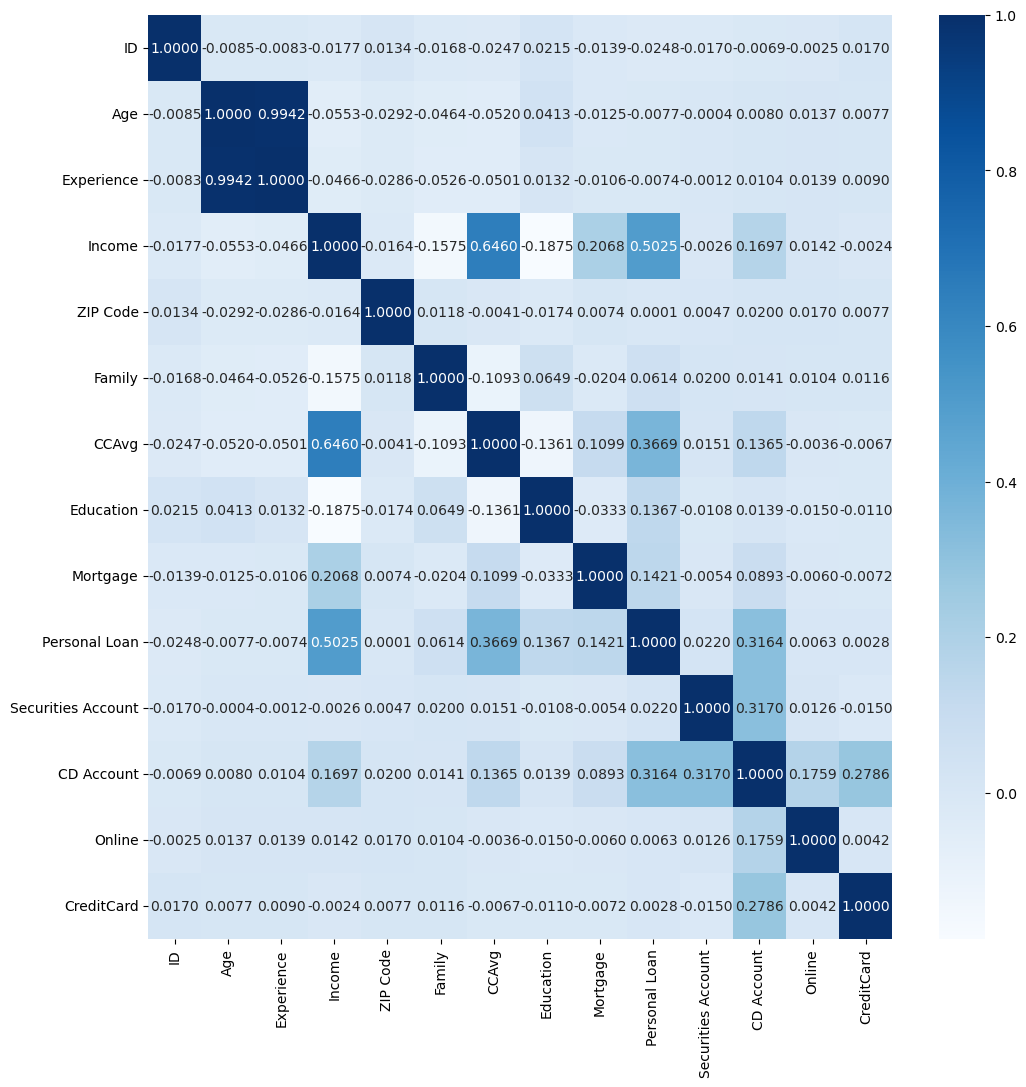

In [10]:
plt.figure(figsize =(12, 12)) 

sns.heatmap(correlation, fmt='.4f', annot=True, cmap='Blues')

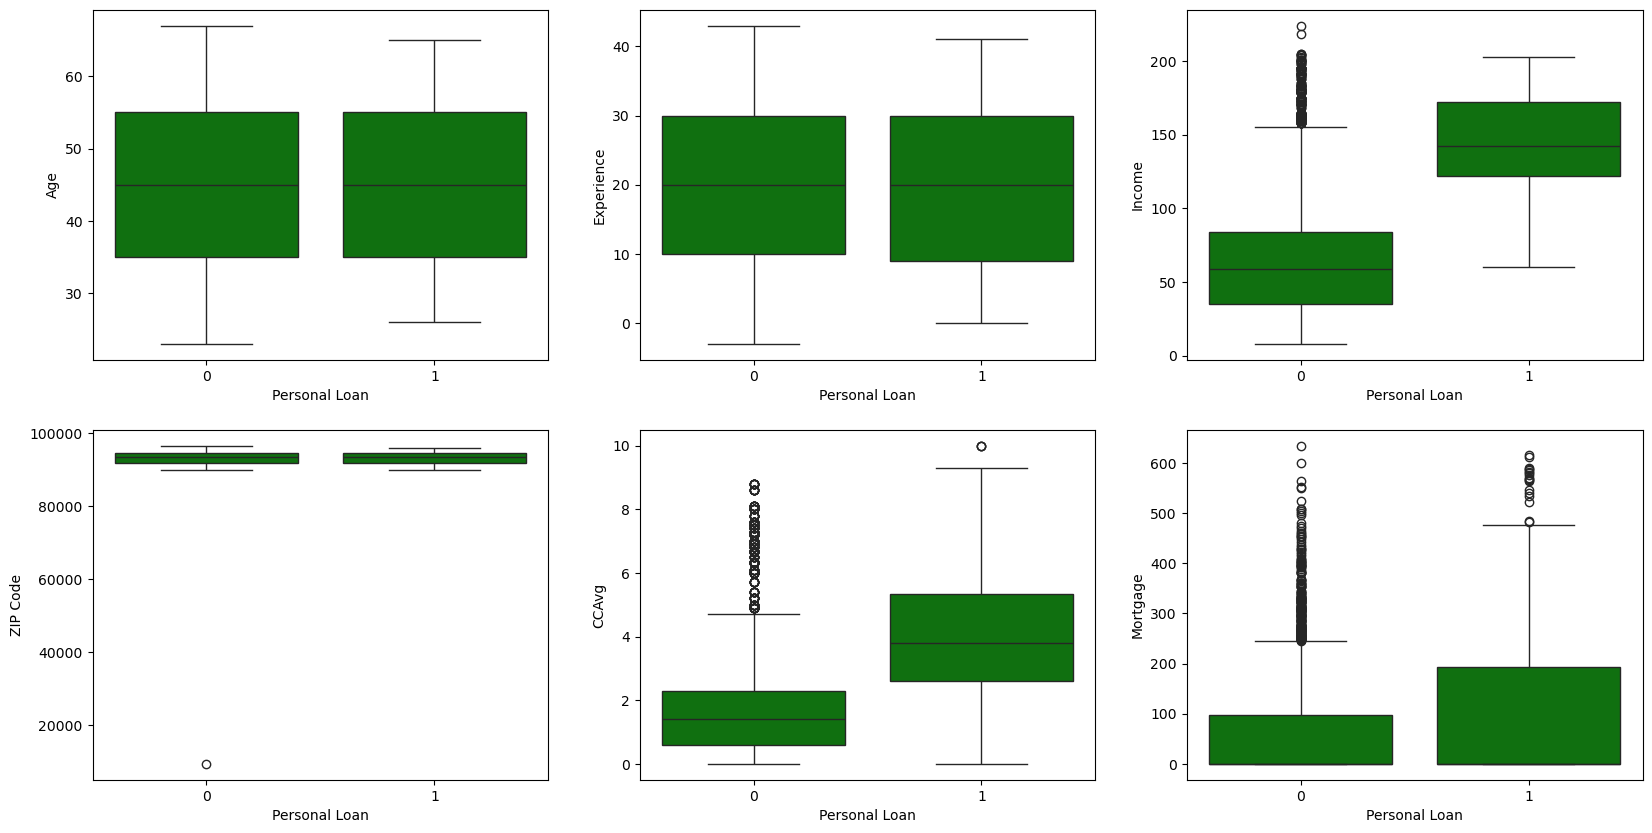

In [11]:
fig = plt.figure(figsize=(20, 10))
i = 0
for col in continuous_variables:
    ax = fig.add_subplot(2, 3, i + 1) 
    sns.boxplot(y=data[col], x=data['Personal Loan'], color='green')
    i += 1  

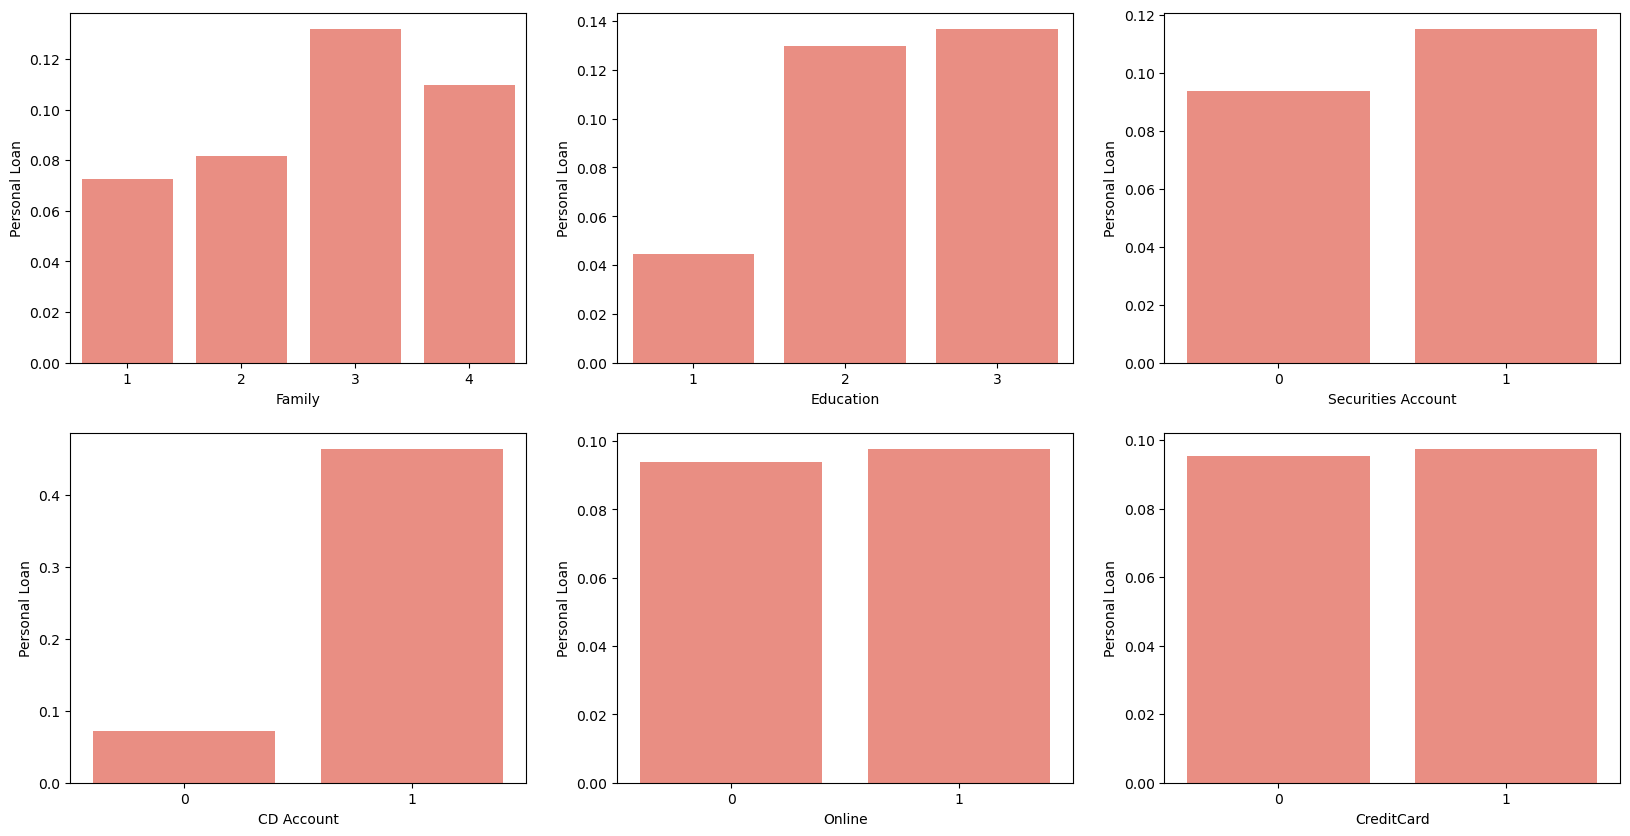

In [12]:
fig=plt.figure(figsize=(20,10))

for i,col in enumerate(categorical_variables):

    ax=fig.add_subplot(2,3,i+1)

    sns.barplot(x=col,y='Personal Loan',data=data,ci=None, color = "salmon")

In [13]:
#Splitting the data to features and classes (X and y)
X = data.drop(columns={"Personal Loan",'ID'},axis=1)
y = data['Personal Loan']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

### 3️⃣ Model Development
(Train–test split, model selection, and training)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp = train_test_split(X_scaled,y,test_size=0.3,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train.shape,X_test.shape,X_val.shape,X.shape


((3500, 12), (750, 12), (750, 12), (5000, 12))

#### Naine Bayes Classifier

In [16]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
BernoulliClassifier = BernoulliNB()
BernoulliClassifier.fit(X_train,y_train)
y_pred=BernoulliClassifier.predict(X_test)
#Test the model 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')
print('\nConfusion Matrix:\n',conf_matrix)
print('\nClassification Report:\n',classification_rep)

Accuracy: 0.920

Confusion Matrix:
 [[669  14]
 [ 46  21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       683
           1       0.60      0.31      0.41        67

    accuracy                           0.92       750
   macro avg       0.77      0.65      0.68       750
weighted avg       0.91      0.92      0.91       750



<Axes: >

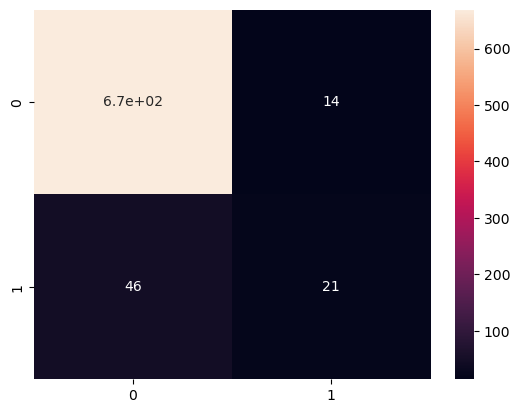

In [17]:
sns.heatmap(conf_matrix, annot=True)

#### Checking for overfitting 

In [18]:
# Evaluate on training, validation, and test sets
train_acc = BernoulliClassifier.score(X_train, y_train)
val_acc = BernoulliClassifier.score(X_val, y_val)
test_acc = BernoulliClassifier.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

# Check for overfitting
if train_acc > val_acc + 0.05:
    print("The model is likely overfitting to the training data.")
else:
    if (np.abs(val_acc-test_acc)) <= 0.05:
        print("The model generalizes well.")
    else:
        print("The model is likely overfitting to the training data.")

Training Accuracy: 0.921
Validation Accuracy: 0.903
Test Accuracy: 0.920
The model generalizes well.


#### Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=10)
model.fit(X_train,y_train)
y_predTree=model.predict(X_test)
#Test the model
accuracy1 = accuracy_score(y_test, y_predTree)
conf_matrix1 = confusion_matrix(y_test, y_predTree)
classification_rep1 = classification_report(y_test, y_predTree)
print(f'Accuracy: {accuracy1:.3f}')
print('\nConfusion Matrix:\n',conf_matrix1)
print('\nClassification Report:\n',classification_rep1)

Accuracy: 0.981

Confusion Matrix:
 [[677   6]
 [  8  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       683
           1       0.91      0.88      0.89        67

    accuracy                           0.98       750
   macro avg       0.95      0.94      0.94       750
weighted avg       0.98      0.98      0.98       750



#### Checking for overfitting 

In [20]:
# Evaluate on training, validation, and test sets
train_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)
test_acc = model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

# Check for overfitting
if train_acc > val_acc + 0.05:
    print("The model is likely overfitting to the training data.")
else:
    if (np.abs(val_acc-test_acc)) <= 0.05:
        print("The model generalizes well.")
    else:
        print("The model is likely overfitting to the training data.")

Training Accuracy: 0.999
Validation Accuracy: 0.985
Test Accuracy: 0.981
The model generalizes well.


#### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train,y_train)
y_pred_rf=RFC.predict(X_test)
#Test the model
accuracy2 = accuracy_score(y_test, y_pred_rf)
conf_matrix2 = confusion_matrix(y_test, y_pred_rf)
classification_rep2 = classification_report(y_test, y_pred_rf)
print(f'Accuracy: {accuracy2:.3f}')
print('\nConfusion Matrix:\n',conf_matrix2)
print('\nClassification Report:\n',classification_rep2)

Accuracy: 0.988

Confusion Matrix:
 [[682   1]
 [  8  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       683
           1       0.98      0.88      0.93        67

    accuracy                           0.99       750
   macro avg       0.99      0.94      0.96       750
weighted avg       0.99      0.99      0.99       750



#### Checking for overfitting 

In [22]:
# Evaluate on training, validation, and test sets
train_acc = RFC.score(X_train, y_train)
val_acc = RFC.score(X_val, y_val)
test_acc = RFC.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

# Check for overfitting
if train_acc > val_acc + 0.05:
    print("The model is likely overfitting to the training data.")
else:
    if (np.abs(val_acc-test_acc)) <= 0.05:
        print("The model generalizes well.")
    else:
        print("The model is likely overfitting to the training data.")

Training Accuracy: 1.000
Validation Accuracy: 0.991
Test Accuracy: 0.988
The model generalizes well.
